### Housing Violations Stat test

11/24/2019

Benny Cohen


The nyc housing dataset records when housing incidents occur in NYC. It can be found here.https://data.cityofnewyork.us/Housing-Development/Housing-Maintenance-Code-Violations/wvxf-dwi5 Let's try to find out if incidents tend to be opened in certain months more than others.

First let's import our needed libraries

In [1]:
import pandas as pd
%matplotlib inline

When we import the data we use an sql query to only select the rows in 2014. We set a really high limit that way we get all the rows for that year. We choose 2014 as the year of choice arbitrarily. 

In [2]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2014-01-01T12:00:00'%20and%20'2014-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])

Let's plot to see what this data looks like

In [3]:
series = df.inspectiondate.dt.to_period('M')

In [4]:
sortedcounts = series.value_counts().sort_index()

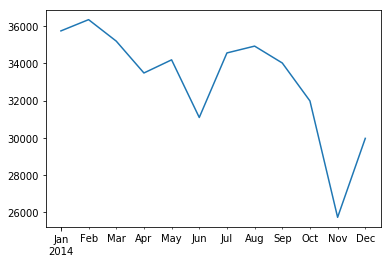

In [5]:
sortedcounts.plot()

It seems from this plot that November 2014 had significant less number of inspections. 
Let's see if this difference is signifcant

Let's model this as a bernoulli random variable since there are 2 possibilities here. Either an inspection was in November or it wasn't. If all months had an equal number of incidents per month we would expect that each month would have 100/12 or 25/3  (8.3) percent of the incidents each month. 

In [6]:
n = sortedcounts.sum()
n

397234

In [9]:
p = sortedcounts['2014-11']/n
q = 1-p
p

0.06470241721504201

We see that November had 6.4 percent of inspections. Now let's try to create a 95 percent boundry around this number. If this 8.3 baseline number we set as the average number of incidents per month is not included in this boundry, we can conclude that there is only a 5 percent chance that the number of inspections in November was at <i> best </i> average

To do this, let's assume that it is a given that the sum of independendant bernoulli random variables is a binomial distribution. There are a myriadof ways to prove this which we won't do here. Then we can use the MVUE estimator p/n to approximate p and use sqrt(pq/n) for the standord error. 

Now we already actually know our answer since p/n is consistant estimator, meaning as n -> infinitiy our estimator converges on the true probability and here n is pretty large and intuitivly we could see that our baseline 8.333 is very far away but we could still do this formally

We already have p = .064 so...

In [22]:
import math
tmp = p * q / n
standordError = math.sqrt(tmp)
standordError

0.000390312043493722

So as n gets large we can approximate this by the CLT by a normal distrubution... Then we can set 95 percent confidence interval with our standord error with a z value of 1.96

In [11]:
er = 1.96 * standordError
lowerBound,upperBound = (p - er, p+er)
lowerBound,upperBound

(0.06393740560979431, 0.0654674288202897)

Note how 8.33 which we set as our baseline for saying that the month of November had an average number of incidents is not included in this range. We therefore can conclude that November has a 95 percent chance of having less than an avg number inspections.

We can make this boundry bigger for a higher percentage but it's fine for now

The question now is was this a one year phenomenon? What happened the next year in November. Let's plot the graph to have a look. 

In [12]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2015-01-01T12:00:00'%20and%20'2015-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])

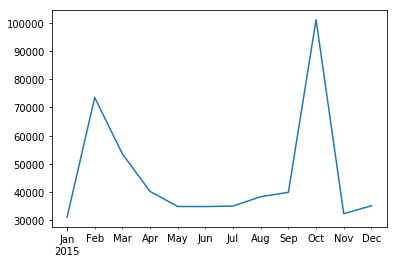

In [13]:
series = df.inspectiondate.dt.to_period('M')
sortedcounts = series.value_counts().sort_index()
sortedcounts.plot()

Interesting...The shape of this graph is very different. We see a rise in incidents in October then a suddent drop in Noveber then a rise again in February. Let's look at another few years.

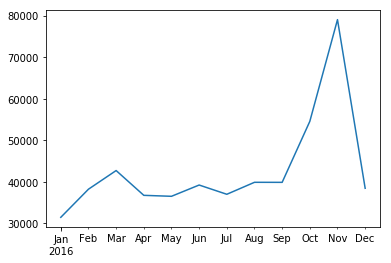

In [14]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2016-01-01T12:00:00'%20and%20'2016-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])
series = df.inspectiondate.dt.to_period('M')
sortedcounts = series.value_counts().sort_index()
sortedcounts.plot()

This graph looks like the rise in incidents was in November

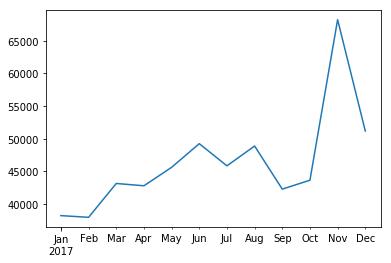

In [15]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2017-01-01T12:00:00'%20and%20'2017-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])
series = df.inspectiondate.dt.to_period('M')
sortedcounts = series.value_counts().sort_index()
sortedcounts.plot()

Again November had the most incidents in 2017

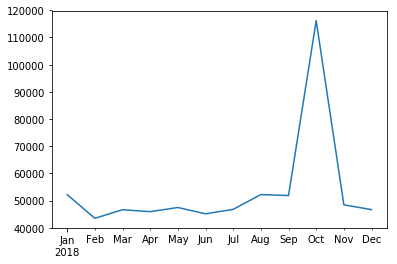

In [17]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2018-01-01T12:00:00'%20and%20'2018-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])
series = df.inspectiondate.dt.to_period('M')
sortedcounts = series.value_counts().sort_index()
sortedcounts.plot()

Here October saw the rise... another Fall month. Let's see if 2013 followed the trend 2014 had

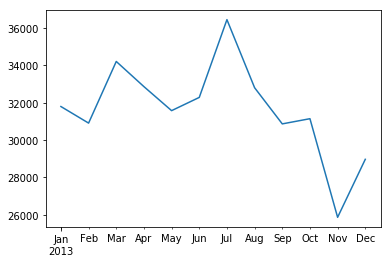

In [19]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2013-01-01T12:00:00'%20and%20'2013-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])
series = df.inspectiondate.dt.to_period('M')
sortedcounts = series.value_counts().sort_index()
sortedcounts.plot()

It seems from the graphs from the last few years that the number of incidents opened rise in the fall, perhaps in preparation for the winter but honestly I have no idea why. In previous years it seems like the inspections happened more evenly throughout the years. I lack the background to explain why but do note that can recommend that buildings prepare for inspections in the coming year during the fall

In [ ]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv?$query=Select%20inspectiondate%20where%20inspectiondate%20between%20'2013-01-01T12:00:00'%20and%20'2013-12-31T23:59:00'%20limit%20900000", parse_dates = ['inspectiondate'])
series = df.inspectiondate.dt.to_period('M')
sortedcounts = series.value_counts().sort_index()
sortedcounts.plot()